In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("data.csv")
data = data.drop(columns=['filename'])
data.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.349943,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,42.351032,-6.376458,...,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,0.340983,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,35.874687,2.916037,...,5.376803,-2.239120,4.216963,-6.012273,0.936109,-0.716537,0.293876,-0.287431,0.531573,blues
2,0.363603,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,31.689013,-13.987036,...,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,0.404779,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,26.871927,1.754462,...,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,0.308590,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,22.153301,-32.489269,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues


In [2]:
data.columns

Index(['chroma_stft', 'spectral_centroid', 'spectral_bandwidth', 'rolloff',
       'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19',
       'mfcc20', 'label'],
      dtype='object')

In [3]:
data.shape

(1000, 26)

In [4]:
# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [6]:
#Use PCA to reduce feature size to 2
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (1000, 25)
transformed shape: (1000, 2)


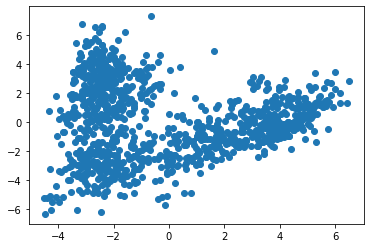

In [7]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.show()

In [8]:
# Create a kmeans model using k = 9, for the 9 genres
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=9)

# Fit the model to the data
kmeans.fit(X_pca)

# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters = kmeans.predict(X_pca)

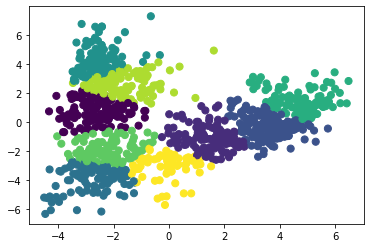

In [9]:
 # Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_clusters, s=50, cmap='viridis')
plt.show()

In [10]:
 # Print the cluster centers and cluster labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_


In [11]:
centers


array([[-2.61705727,  0.79029139],
       [ 1.40097703, -1.10187874],
       [ 3.62830203, -0.30083635],
       [-2.74982712, -3.96145753],
       [-2.54474387,  4.33235723],
       [ 4.73421495,  1.50390354],
       [-2.18245214, -1.8902556 ],
       [-1.63977831,  2.64216772],
       [-0.0779451 , -3.05902751]])

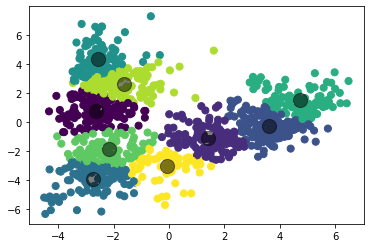

In [12]:
 plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()

In [13]:
#using test data and predicting

test_data=pd.read_csv('Testdata.csv')

In [18]:
test_data = test_data.drop(columns=['filename', 'label'])
test_data.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.430936,0.110694,2442.785643,2915.456674,5670.865709,0.073184,-190.962662,81.922966,42.553303,32.291203,...,2.488529,4.890075,1.366096,-2.889347,0.040542,-1.458207,-2.538516,-2.628987,-2.856635,-1.249145
1,0.346963,0.122122,2757.332814,2611.921131,5848.422969,0.130378,-94.128960,68.174881,-4.051095,13.342934,...,-8.247558,-8.146507,-6.071809,-6.335148,-2.611379,-3.512453,-2.537906,-0.136862,0.798572,-0.725953
2,0.231934,0.172526,1487.967941,2028.305165,3056.223186,0.048846,-153.480103,136.500168,4.522055,28.937588,...,-9.555628,-10.578224,-15.407278,-3.126045,-9.627593,-10.926598,-7.032397,-9.769959,-5.283998,-2.460332


In [23]:
#Need to use PCA to reduce feature size to from 26 to 2

pca = PCA(n_components=2)
pca.fit(test_data)
X_pca_test = pca.transform(test_data)
print("original shape:   ", test_data.shape)
print("transformed shape:", X_pca_test.shape)

original shape:    (3, 26)
transformed shape: (3, 2)


In [24]:
kmeans.predict(X_pca_test)

array([4, 3, 5])